In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import copy
import math

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

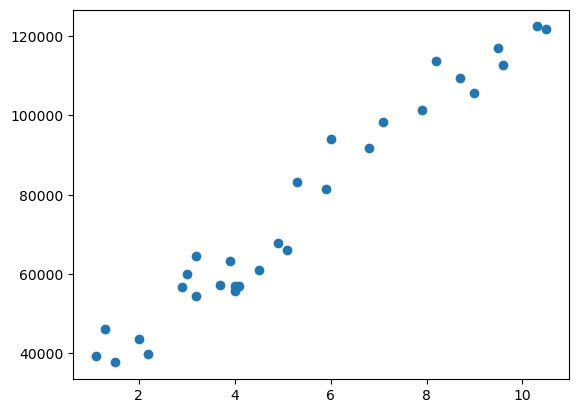

In [4]:
plt.scatter(X,y)

In [5]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    total_cost = 0
    
    for i in range(m):
        f_wb = w*x[i] + b 
        cost = (y[i] - f_wb)**2
        total_cost = total_cost + cost
    total_cost = total_cost/(2*m)
    return total_cost


In [6]:
initial_w = 0
initial_b = 0
compute_cost(X,y, initial_w, initial_b)

array([3.25147764e+09])

In [7]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        dw_inter = (f_wb - y[i])*x[i]
        db_inter = f_wb - y[i]
        dj_dw = dw_inter + dj_dw
        dj_db = db_inter + dj_db
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

In [8]:
compute_gradient(X, y, initial_w, initial_b)

(array([-477398.7]), array([-76003.]))

In [9]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    j_history = []
    w_history = []
    w = copy.deepcopy(w_in)     # avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        if i < 100000:
            cost = cost_function(x,y,w,b)
            j_history.append(cost)
            
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(i, j_history[-1])
            
    return w, b, j_history, w_history
            

In [10]:
w,b,_,_ = gradient_descent(X,y,initial_w, initial_b, compute_cost, compute_gradient, 0.01, 100)


0 [1.34461253e+09]
10 [74522833.02695376]
20 [71955677.46187694]
30 [69620330.13081625]
40 [67381831.62732285]
50 [65236153.15061297]
60 [63179445.88853751]
70 [61208020.62245554]
80 [59318341.10830604]
90 [57507017.73347025]


In [11]:
w, b

(array([12315.52743012]), array([6481.91749872]))

### prediction 

In [12]:
m = X.shape[0]
predicted = np.zeros(m)
for i in range(m):
    predicted[i] = w* X[i] + b

Text(0.5, 0, 'Years Experience')

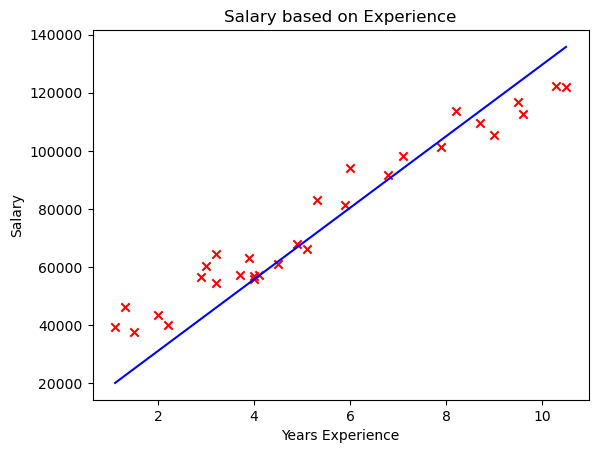

In [13]:
# plot the model 
plt.plot(X, predicted, c= 'b')
plt.scatter(X, y, marker='x', c= 'r')
plt.title('Salary based on Experience')
plt.ylabel('Salary')
plt.xlabel('Years Experience')